# Session 1 - Your "first" DataScience problem

In [418]:
from IPython.core.pylabtools import figsize
# some imports

from IPython.display import display, HTML
from numpy.lib.twodim_base import tril_indices
from tensorboard.compat.tensorflow_stub.dtypes import int16

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [419]:
## load data
# train_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/train_set.csv',index_col=0) 
# test_set = pd.read_csv('/kaggle/input/ml-ub-2024-project-1/test_set.csv/test_set.csv',index_col=0)

## load data
train_set = pd.read_csv('../dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('../dataset/housing-snapshot/test_set.csv',index_col=0) 



## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [420]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [421]:
# print the top elements from the dataset
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [422]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.

In [423]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [424]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [425]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

Type
h    3765
u    1191
t     476
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Type'>

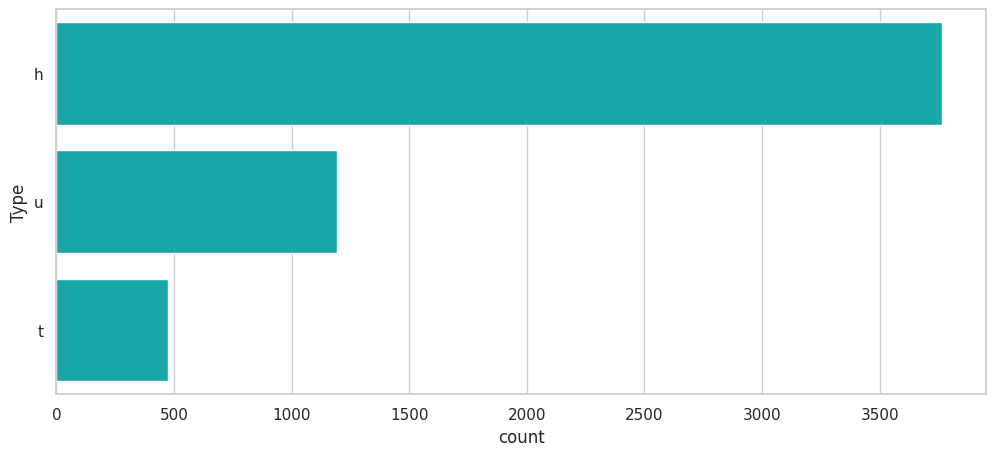

In [426]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

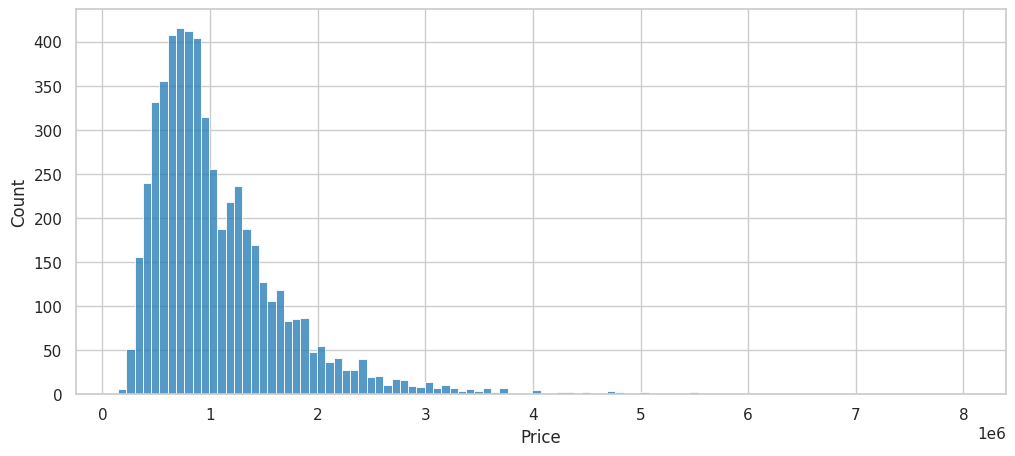

In [427]:
sns.histplot(train_set["Price"])
plt.show()

## BASELINE MODEL
### https://www.kaggle.com/t/dd6d7e5591dc4101a895872672dfdfa9

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 398631.7157628393
R^2:  0.6203990805326086


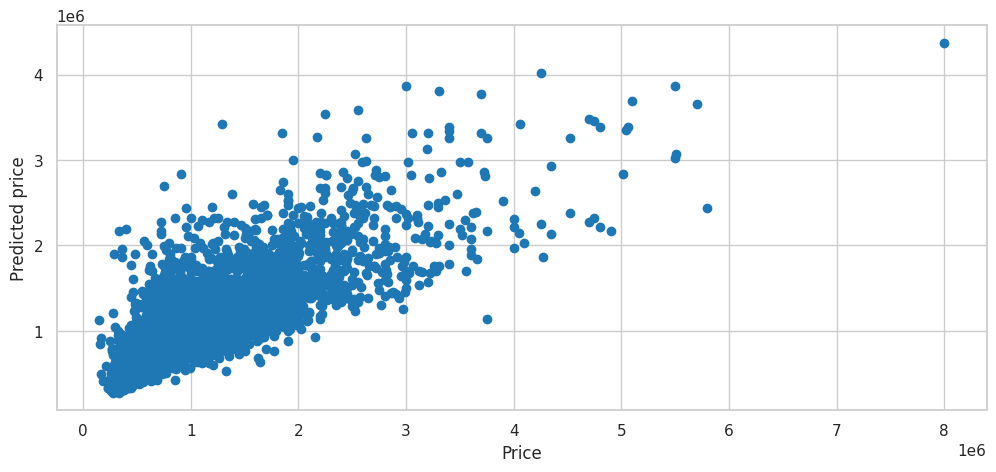

In [428]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price')
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [429]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

Explain the choosed model and why you think that is is the best

## Data preprocessing

The first step before applying linear regression is to clean and encode the data to ensure optimal model performance during fitting.
We will start with the NaN count and removal.

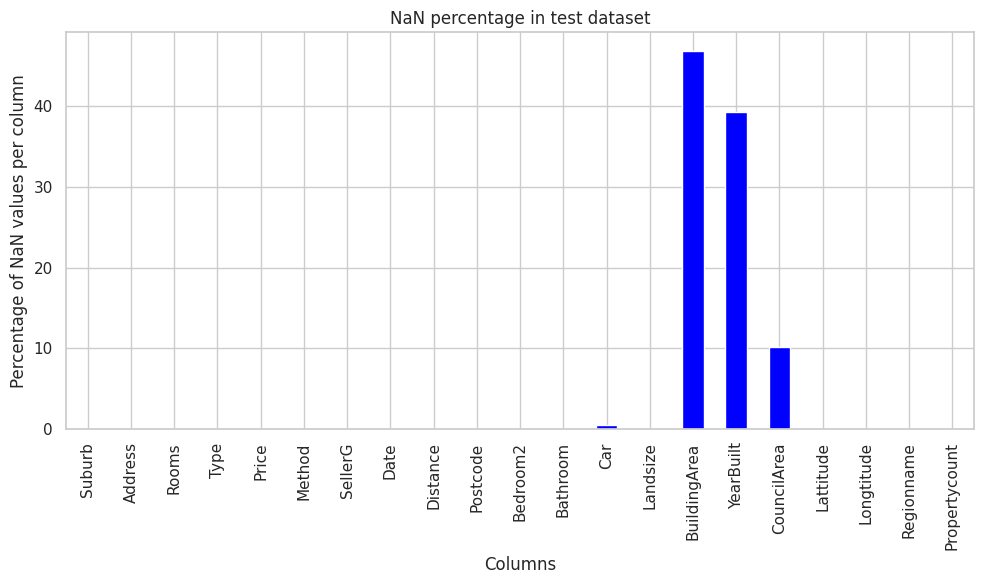

In [430]:
# Count the number of NaNs per column so that we can avoid having problems with data quality.
nans = (train_set.isna().sum() / len(train_set)) * 100

nans.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('NaN percentage in test dataset')
plt.ylabel('Percentage of NaN values per column')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()


As we can see at the previous graph, the amount of missing data is notably big in _BuildingArea_, _YearBuild_ and _CouncilArea_. Both _BuildingArea_ and _CouncilArea_ are not a problem for us since we were not going to use them anyway, as having the _Longitude_ and _Latitude_, this information becomes redundant. _YearBuild_ on the other hand, if the data quality was good enough, it would have provided us with another useful feature.

We considered filling the NaNs with 0 or average values, but we are not sure whether this would fix the problem. Another option would be dropping all the NaNs, even though that would mean loosing almost half of the dataset entries, we will consider it in the future if the results are not good enough, or if we find ourselves with an overfitting issue. For the time being we will just not use this column.

On another note, we see that the number of cars has also some NaNs. The fact that the number of NaN cars does not even reach the 10% of rows, makkes us think that in this case, we can substitute the NaN values for the median option.

In [431]:
car_median = train_set['Car'].median()
train_set['Car'] = train_set['Car'].fillna(car_median)

The next step resides in encoding all the categorical data that we want to use, which is going to be _Type_, _Method_ and _SellerG_.

Given that the three categorical features that we want to use are Nominal, we can not apply an Ordinal Encoding thus we will be using a One Hot encoder.

Before applying the encoder we need to explore the data.

In [432]:
# Data exploration
cat_features = ['Type', 'Method', 'SellerG']

for feature in cat_features:    
    train_f_u = train_set[feature].unique()
    test_f_u = test_set[feature].unique()
    
    print(f"Train set {feature} count unique: {len(train_f_u)}")
    print(f"Test set {feature} count unique: {len(test_f_u)}")
    
    print('Same feature options\n') if set(train_f_u) == set(test_f_u) else print('Different feature options\n')
    

Train set Type count unique: 3
Test set Type count unique: 3
Same feature options

Train set Method count unique: 5
Test set Method count unique: 5
Same feature options

Train set SellerG count unique: 203
Test set SellerG count unique: 230
Different feature options



Exploring the end results after the encoding, we can determine that both the Type and Method features can be easily be encoded as they have a limited amount of options, meaning that we won't have trouble when using the test or predicting new entries as all the options are contained in the train dataset. At the same time the number of possible options are quite low, 3 and 5 which will allow us to easily apply a One Hot encoding method.

On the other hand, the SellerG feature has the issue that the options are unlimited, meaning that the unique values found in the train dataset and the ones found in the test dataset are not the same, therefore, we can not assure that new entries that will be predicted will have a value found within the train set. At the same time, the huge amount of possible options, 203, makes it unbearable to apply a One Hot encoding.

In conclusion, we will not be using the _SellerG_ feature, even though we expect that it brings great value to the regression.

In [433]:
# Data encoding:
#   - Create the vector for each row as a df with 1s and 0s
#   - Drop the column from the dataframe that contains the original information
#   - Concat the vectors with the dataframe

def encode_and_bind(df: pd.DataFrame, feature: str):
    dummies = pd.get_dummies(df[[feature]], dtype=int)
    df = df.drop(feature, axis=1)
    res = pd.concat([df, dummies], axis=1)
    return res

def e_type_method(e_set):
    for f in ['Type', 'Method']:
        e_set = encode_and_bind(e_set, f)
    return e_set

train_set = e_type_method(train_set)

Once the categorical features that we want to use have been encoded, we proceed to drop from the df the features that won't be used.

In [434]:
# Save the Year Built maybe we need it later
year_built = train_set[['YearBuilt']].copy

dropped_columns = ['Suburb', 'Address', 'SellerG', 'CouncilArea', 'Regionname', 'Postcode', 'YearBuilt', 'BuildingArea']

train_set = train_set.drop(dropped_columns, axis=1)

From our point of view the Date feature gives us a lot of information although not straight out.
We know that the prices fluctuate over time which allow us to use the date (month and year) as ordinal data. At the same time we consider that factors such as the day of week or the season can also affect the final price. In these final cases we will need to consider the data as categorical as it is possible that some cycles and non-linear relations appear.

Knowing that we will proceed to perform a one-hot encoding for the DOW and the season.

In [435]:
# Transform the train_set date from str to date object
train_set['Date'] = pd.to_datetime(train_set['Date'], format='%d/%m/%Y')

In [436]:
def get_season(date):
    
    year = date.year
    
    winter_start = pd.to_datetime(f"{year}-12-21", format = "%Y-%m-%d").dayofyear
    spring_start = pd.to_datetime(f"{year}-3-21", format = "%Y-%m-%d").dayofyear
    summer_start = pd.to_datetime(f"{year}-6-21", format = "%Y-%m-%d").dayofyear
    autumn_start = pd.to_datetime(f"{year}-9-23", format = "%Y-%m-%d").dayofyear

    if (date.dayofyear >= winter_start) or (date.dayofyear < spring_start):
        return "Winter"
    elif (date.dayofyear >= spring_start) and (date.dayofyear < summer_start):
        return "Spring"
    elif (date.dayofyear >= summer_start) and (date.dayofyear < autumn_start):
        return "Summer"
    else:
        return "Autumn"

# Get the name of the day of the week (Monday, Tuesday...)
train_set['DOW'] = train_set['Date'].dt.day_name()

# Get the name of the season based on the date (Winter, Spring...)
train_set['season'] = train_set['Date'].apply(get_season)


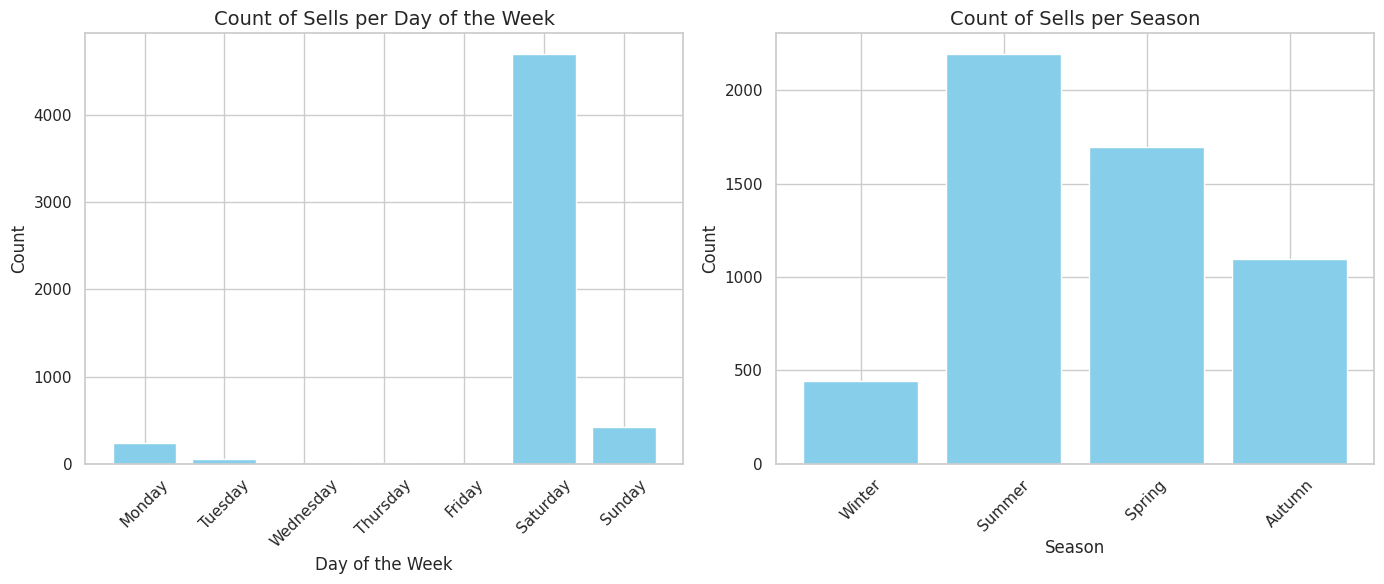

In [437]:
# Count of sells per day of the week
day_counts_dow = train_set['DOW'].value_counts()
day_counts_dow = day_counts_dow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count of sells per season
day_counts_season = train_set['season'].value_counts()
day_counts_season = day_counts_season.reindex(['Winter', 'Summer', 'Spring', 'Autumn'])

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Count of sells per day of the week
ax[0].bar(day_counts_dow.index, day_counts_dow, color='skyblue')
ax[0].set_title('Count of Sells per Day of the Week', fontsize=14)
ax[0].set_xlabel('Day of the Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xticks(range(len(day_counts_dow)))
ax[0].set_xticklabels(day_counts_dow.index, rotation=45)

# Second subplot: Count of sells per season
ax[1].bar(day_counts_season.index, day_counts_season, color='skyblue')
ax[1].set_title('Count of Sells per Season', fontsize=14)
ax[1].set_xlabel('Season', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xticks(range(len(day_counts_season)))
ax[1].set_xticklabels(day_counts_season.index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


In [438]:
# Encode DOW and seasons
def e_DOW_season(e_set):
    for f in ['DOW', 'season']:
        e_set = encode_and_bind(e_set, f)
    return e_set
train_set = e_DOW_season(train_set)

As per the date itself, now that we have isolated the day of the week and the season, we can transform the date to a timestamp that way can be easily used by the regression.

In [439]:
train_set['Date'] = train_set['Date'].astype(np.int64) // 10 ** 9

Now all the data has been prepared to be used for the regression, we will proceed to create the regression.

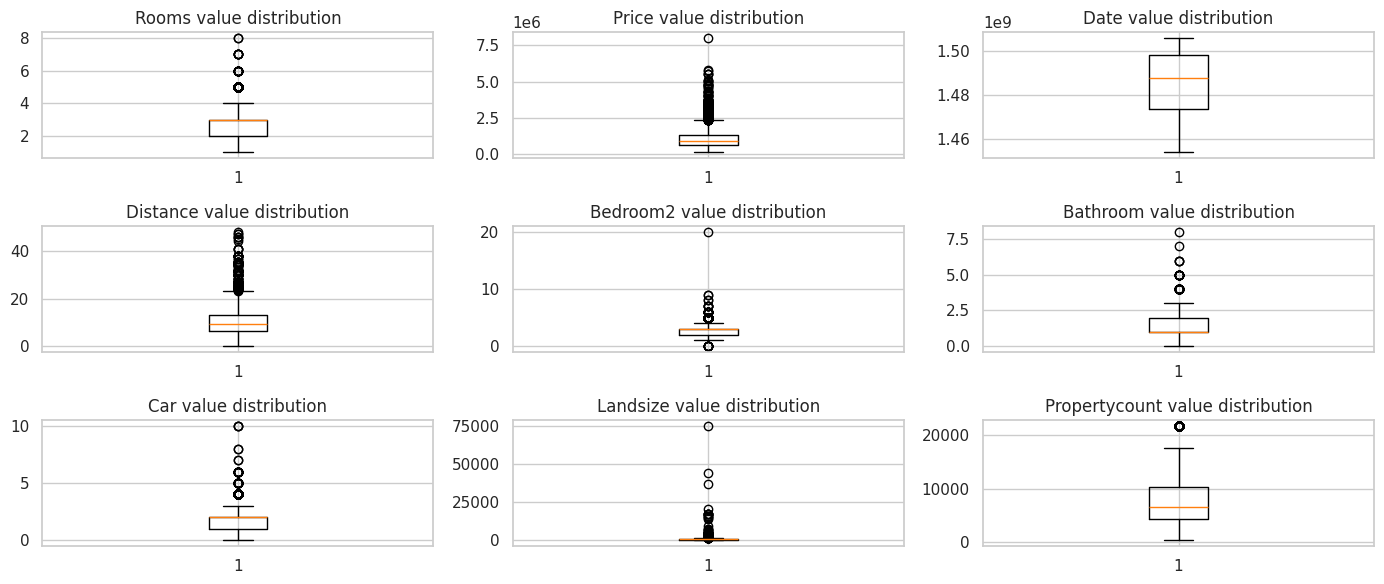

In [440]:
def boxplot_quant_data():
    quantitative_columns = ['Rooms', 'Price', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']
    
    fig, ax = plt.subplots(3, 3, figsize=(14, 6))
    
    for i in range(3):
        for j in range(3):
            feature = quantitative_columns[3*i + j]
            ax[i][j].boxplot(train_set[feature])
            ax[i][j].set_title(f'{feature} value distribution')
    
    plt.tight_layout()
    plt.show()
    
boxplot_quant_data()

By looking on the previous plots we can see that negative values are non-existent in our data, good news. On the other hand, we can see some 0s which can not exist in rooms, bedrooms, bathrooms or price. At the same time, the number of bathrooms plus the number of bedrooms can shouldn't exceed the total number of rooms.

The next steps consist on assuring that the features represented as integer values do no contain floats.

In [441]:
# Remove the 0s
train_set = train_set[train_set['Bedroom2'] > 0]
train_set = train_set[train_set['Bathroom'] > 0]
train_set = train_set[train_set['Price'] > 0]
train_set = train_set[train_set['Rooms'] > 0]

train_set = train_set[train_set['Price'] < 8000000]

In [442]:
"""
We tried removing the entries where the total number of rooms is lower than the combined value of bathrooms and bedrooms using the following code:

train_set = train_set[train_set['Rooms'] >= train_set['Bathroom'] + train_set['Bedroom2']]

But the logic does not apply since this formula deletes 5320 rows, leaving us with only 89 rows for training instead of 5409.
"""

"\nWe tried removing the entries where the total number of rooms is lower than the combined value of bathrooms and bedrooms using the following code:\n\ntrain_set = train_set[train_set['Rooms'] >= train_set['Bathroom'] + train_set['Bedroom2']]\n\nBut the logic does not apply since this formula deletes 5320 rows, leaving us with only 89 rows for training instead of 5409.\n"

In [443]:
# Room integers
train_set = train_set[train_set['Rooms'] == train_set['Rooms'].astype(int)]

# Bedroom integers
train_set = train_set[train_set['Bedroom2'] == train_set['Bedroom2'].astype(int)]

# Bathroom integers
train_set = train_set[train_set['Bathroom'] == train_set['Bathroom'].astype(int)]

# Car integers
train_set = train_set[train_set['Car'] == train_set['Car'].astype(int)]

After removing the all those entries we can check the boxplots again and see the data left.

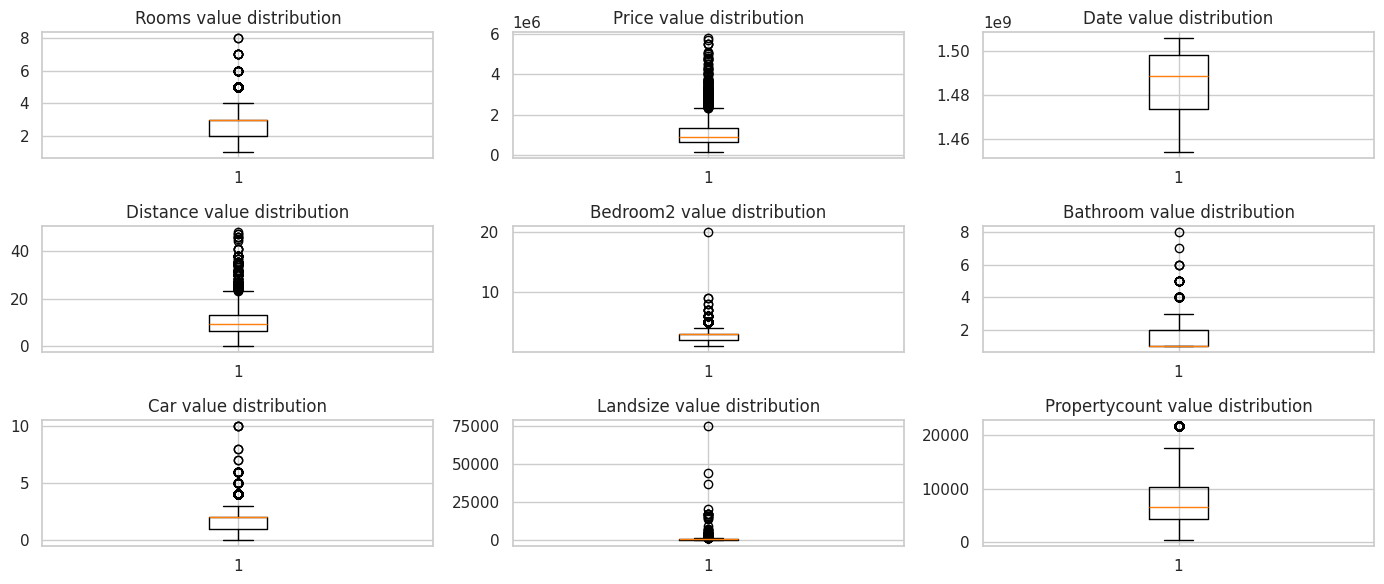

In [444]:
boxplot_quant_data()

Now the data seems better distributed, the only think that catches our eye is the high values on propertycount and landsize.

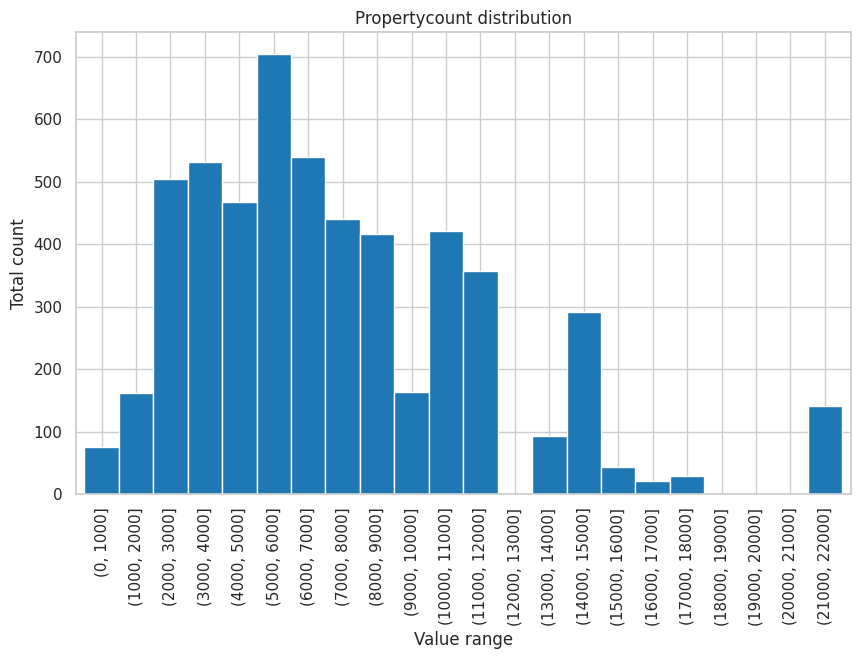

In [445]:
bins = range(0, int(train_set['Propertycount'].max()) + 1000, 1000)
count = pd.cut(train_set['Propertycount'], bins=bins).value_counts().sort_index()

plt.figure(figsize=(10,6))
count.plot(kind='bar', width=1)
plt.title('Propertycount distribution')
plt.xlabel('Value range')
plt.ylabel('Total count')
plt.xticks(rotation=90)
plt.show()


In [446]:
len(train_set[train_set['Propertycount'] >= 21000])

142

As we can see from the previous plot, the count of Propertycount in the range between 21k and 22k does not fit in the right skewed distribution so we will drop those 142 cases.

In [447]:
train_set = train_set[train_set['Propertycount'] < 21000]

Finally, we will remove the entries that have 8 rooms and 20 bedrooms, since it is highly unlikely that they represent real data.

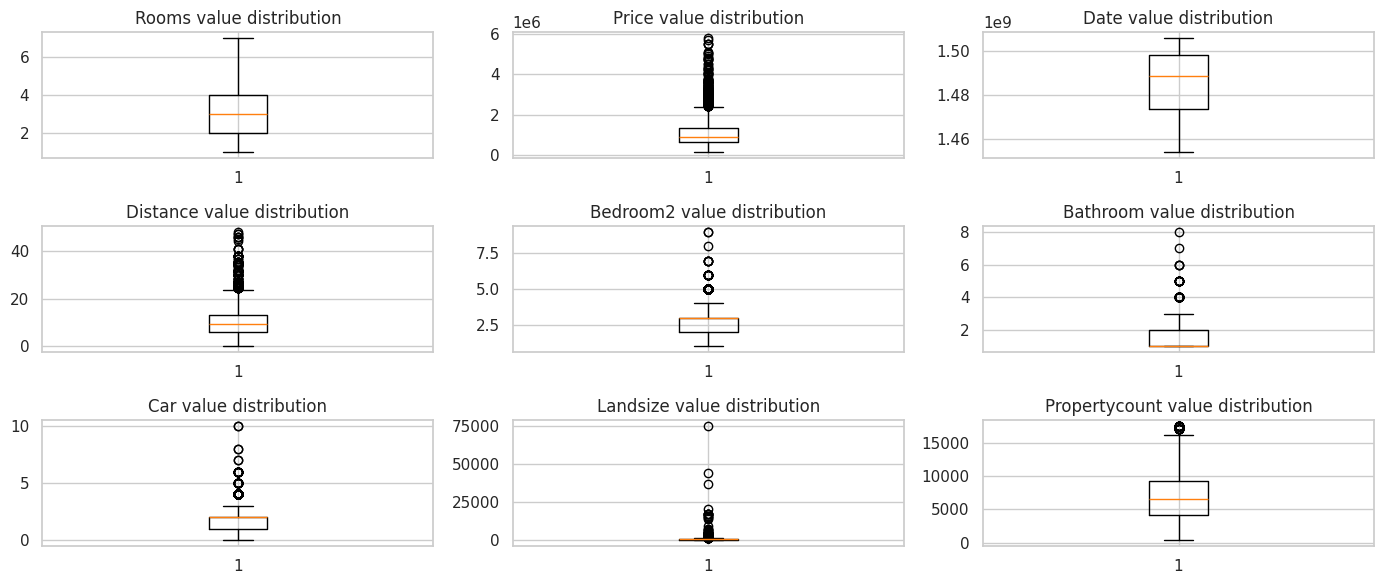

In [448]:
train_set = train_set[train_set['Rooms'] < 8]
train_set = train_set[train_set['Bedroom2'] < 20]

# We will also call the bloxpots so that we can evaluate
boxplot_quant_data()

The next step will focus on the longitude and latitude data cleaning. To do this we will plot the location of all the properties.

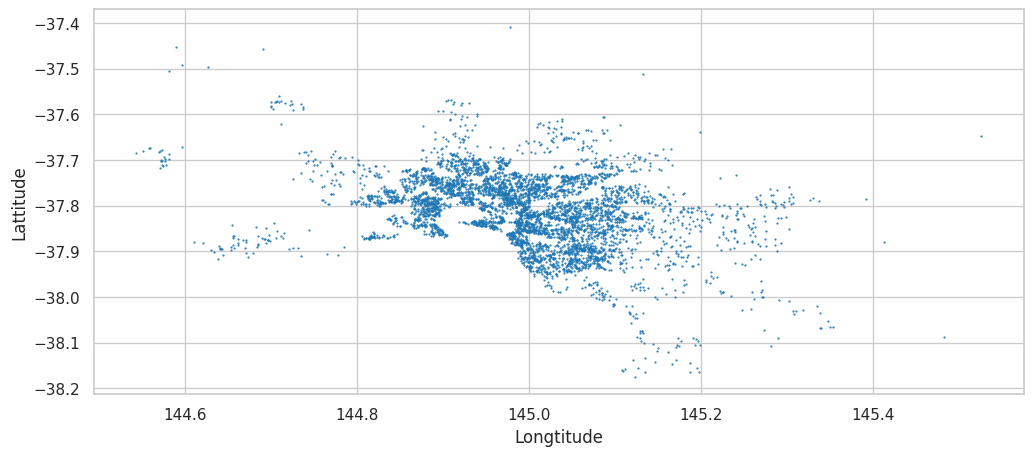

In [449]:
train_set.plot(kind="scatter", x="Longtitude", y="Lattitude", s=0.3)
plt.show()

Knowing that the dataset represents properties in Melbourne, we can compare the distribution against a map of the city.

![Melbourne map](https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Greater_Melbourne_Map_4_-_May_2008.png/440px-Greater_Melbourne_Map_4_-_May_2008.png "Melbourne")

We can consider that in general all the points fall inside the Melbourne grater area.

## Linear regression

Since the exercise only allows us to use 2 diferent models with not many properties to change if the fit is not good enough, we will need to do more data preprocessing.

Starting out, we will apply the linear regression from sklearn.

In [450]:
model = sk.linear_model.LinearRegression()

y_train = train_set['Price']
x_train = train_set.drop(columns=['Price'])

model.fit(x_train, y_train)

# Predict on the training data
y_pred = model.predict(x_train)


----- EVALUATION ON TRAIN SET ------
RMSE: 430862.0601511006
R^2: 0.5536888626269707


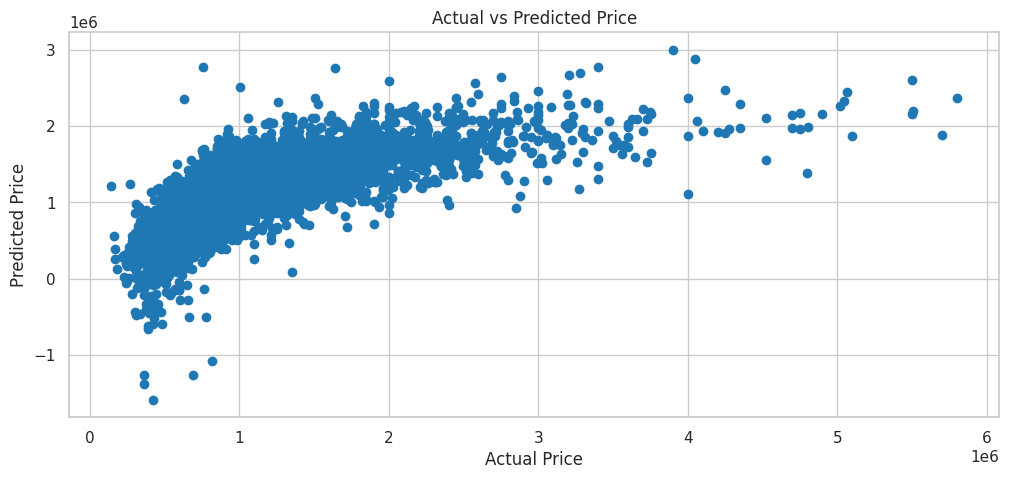

In [451]:
# Evaluation on the training set
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))  # Use y_train here
print("R^2:", r2_score(y_train, y_pred))  # Use y_train here

# Plot actual vs predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Predict on the test set (assuming 'features' is a list of feature column names)
X_test = test_set.copy()
X_test = X_test.drop(columns=dropped_columns)
X_test = X_test.fillna(0)

X_test = e_type_method(X_test)

X_test['Date'] = pd.to_datetime(X_test['Date'], format='%d/%m/%Y')
X_test['DOW'] = X_test['Date'].dt.day_name()
X_test['season'] = X_test['Date'].apply(get_season)
X_test = e_DOW_season(X_test)

X_test['Date'] = X_test['Date'].astype(np.int64) // 10 ** 9


y_pred_test = model.predict(X_test)

# Create a DataFrame for submission
df_output = pd.DataFrame({'Price': y_pred_test})
df_output = df_output.reset_index()
df_output.columns = ['index', 'Price']

df_output.to_csv('output/session1/pred1.csv',index=False)


In [452]:
y_pred_df = pd.DataFrame(y_pred, columns=['Actual Price'])

com = pd.concat([y_pred_df, y_train], axis=1)

com.to_csv('output/session1/train_pred.csv',index=False)

As we can see by the $R^2$ value, this regression is not great. Our first thought is that we are using too many features, we will try to reduce them.



Concretely, the specific problems this model has when predicting the real prices of houses are:

- The predicted price tends to be too low. This starts to be seen once the actual price surpasses 1.000.000, but the difference becomes so important for prices exceeding 2.000.000 the model becomes completely unreliable.

- For low prices (<1.000.000), the predicted price sometimes jumps into the negatives. Although in practical application this result won't misinform the user because of its obvious absurdity, it still indicates unreliability.


Knowing that not all the features may relate directly to the output price, we will check these relations using scatter-plots.

In [453]:
t = list(train_set.columns.values)
t.remove('Price')
print(t)

['Rooms', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB', 'DOW_Monday', 'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']


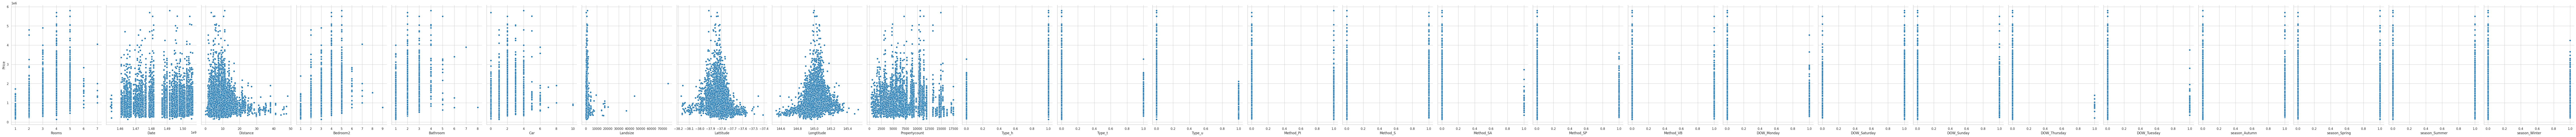

In [454]:
cols = list(train_set.columns.values)
cols.remove('Price')
sns.pairplot(train_set, x_vars=cols, y_vars='Price', height=7, aspect=0.7)
plt.show()

In [455]:
import statsmodels.formula.api as smf

model = smf.ols(formula='Price ~ Rooms + Price + Date + Distance + Bedroom2 + Bathroom + Car + Landsize + Lattitude + Longtitude + Propertycount + Type_h + Type_t + Type_u + Method_PI + Method_S + Method_SA + Method_SP + Method_VB + DOW_Monday + DOW_Saturday + DOW_Sunday + DOW_Thursday + DOW_Tuesday + season_Autumn + season_Spring + season_Summer + season_Winter', data=train_set)

model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.125e+23
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:51:54   Log-Likelihood:                 52833.
No. Observations:                5263   AIC:                        -1.056e+05
Df Residuals:                    5238   BIC:                        -1.055e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.064e-09      0.000    3.7e-05

After observing the summary we can confirm that there is a strong multi-collinearity, meaning that several features are correlated. To solve this we will use a Lasso regression.

Variable 0: Coeficient = 227168.09299440705
Variable 1: Coeficient = 0.0018123431690377006
Variable 2: Coeficient = -47902.44758762463
Variable 3: Coeficient = -37686.562563128544
Variable 4: Coeficient = 222687.70041628534
Variable 5: Coeficient = 40135.159168676386
Variable 6: Coeficient = 18.37562957509109
Variable 7: Coeficient = -1790813.0437439068
Variable 8: Coeficient = 1002439.385235343
Variable 9: Coeficient = 2.379419262868236
Variable 10: Coeficient = 432862.1844848761
Variable 11: Coeficient = 95962.84420370219
Variable 12: Coeficient = -42609.89229685021
Variable 13: Coeficient = -28939.217346706748
Variable 14: Coeficient = 39468.59275858822
Variable 15: Coeficient = -56709.27276432484
Variable 16: Coeficient = -50379.097097671474
Variable 17: Coeficient = 43518.431260946396
Variable 18: Coeficient = -18683.807717171672
Variable 19: Coeficient = -6540.545371991686
Variable 20: Coeficient = 14811.217782339858
Variable 21: Coeficient = 30161.983825018422
Variable 22: Coefi

/home/subi/Documents/UNI/TFG/Testing/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.187e+13, tolerance: 2.189e+12
  model = cd_fast.enet_coordinate_descent(


<Axes: title={'center': 'Lasso Coefficients'}, ylabel='|$b_j$|'>

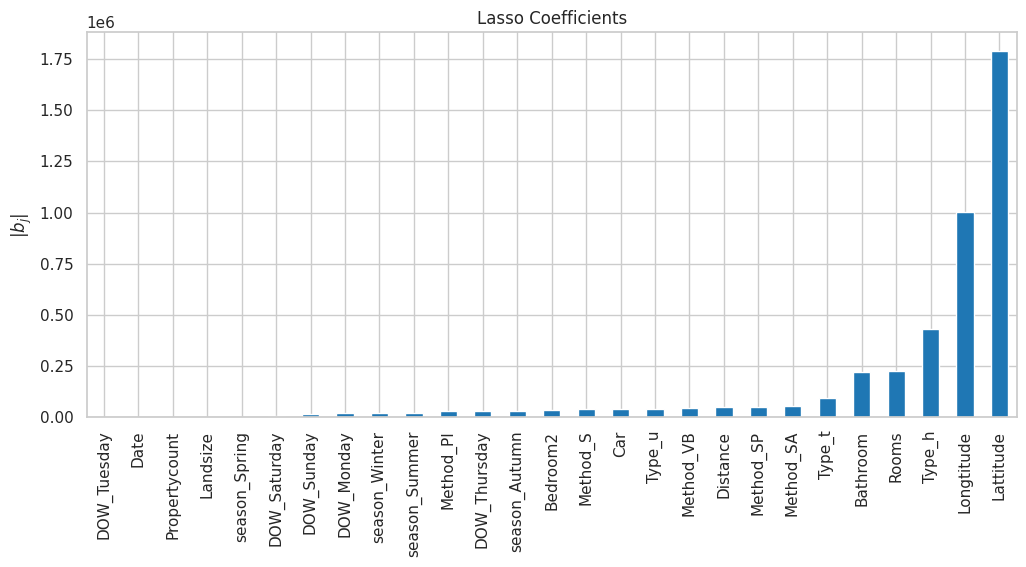

In [456]:
## Lasso Regression
regr_lasso = sk.linear_model.Lasso(alpha=.3,tol=0.001, max_iter=5000) # Create a Ridge regressor
regr_lasso.fit(x_train, y_train)  # Perform the fitting

for idx, coef in enumerate(regr_lasso.coef_):
    print(f"Variable {idx}: Coeficient = {coef}")
    
coef = pd.Series(np.abs(regr_lasso.coef_),cols).sort_values()
coef.plot(kind='bar', title='Lasso Coefficients',ylabel="|$b_j$|")

Seeing that features _Date_, _Propertycount_, _Landsize_, and in general the day of the week or the season do not really affect the output so we will drop them.

In [457]:
train_set = train_set.drop(columns=['Date', 'Propertycount', 'Landsize', 'DOW_Monday', 'DOW_Tuesday', 'DOW_Thursday', 'DOW_Saturday', 'DOW_Sunday', 'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter'])
train_set.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
index,,,,,,,,,,,,,,,,
0,4,1380000.0,7.5,4.0,2.0,2.0,-37.75595,144.90551,1,0,0,0,0,0,0,1
1,2,1100000.0,5.5,2.0,1.0,1.0,-37.77670,144.99240,1,0,0,0,0,0,1,0
2,3,1480000.0,9.2,3.0,1.0,4.0,-37.79510,145.06960,1,0,0,1,0,0,0,0
3,3,1055000.0,5.2,3.0,1.0,1.0,-37.76530,144.95860,1,0,0,0,1,0,0,0
4,4,1000000.0,13.8,4.0,3.0,2.0,-37.76800,145.10270,1,0,0,0,0,0,0,1


Once these columns have been dropped, we will try to make a new linear regression and evaluate the performance taking into account the changes that have been done.

In [458]:
model = sk.linear_model.LinearRegression()

y_train = train_set['Price']
x_train = train_set.drop(columns=['Price'])

model.fit(x_train, y_train)

# Predict on the training data
y_pred = model.predict(x_train)


----- EVALUATION ON TRAIN SET ------
RMSE: 432935.91899597785
R^2: 0.5493820835546275


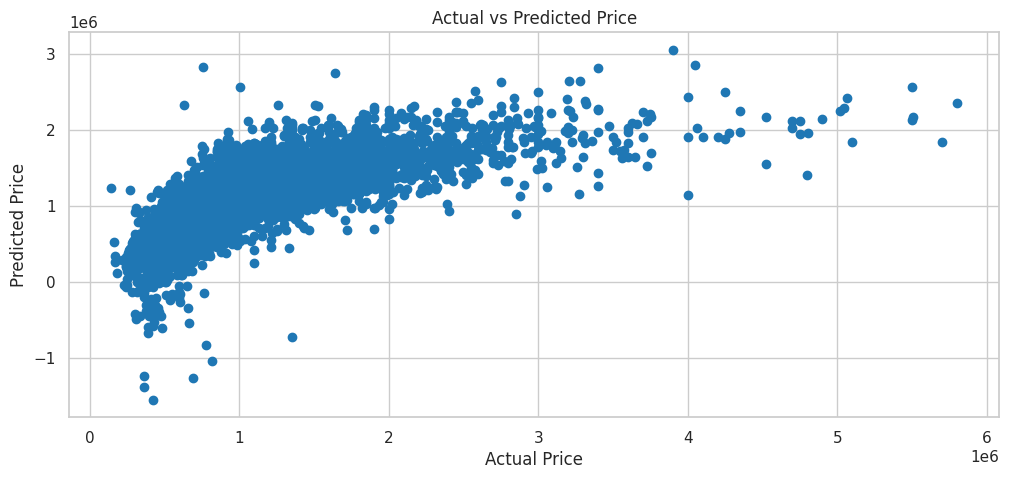

In [459]:
# Evaluation on the training set
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))  # Use y_train here
print("R^2:", r2_score(y_train, y_pred))  # Use y_train here

# Plot actual vs predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Predict on the test set (assuming 'features' is a list of feature column names)
X_test = test_set.copy()
X_test = X_test.drop(columns=dropped_columns + ['Date', 'Propertycount', 'Landsize'])
X_test = X_test.fillna(0)

X_test = e_type_method(X_test)


y_pred_test = model.predict(X_test)

# Create a DataFrame for submission
df_output = pd.DataFrame({'Price': y_pred_test})
df_output = df_output.reset_index()
df_output.columns = ['index', 'Price']

df_output.to_csv('output/session1/pred1.csv',index=False)


The $R^2$ value hasn't increased, which makes sense because we removed the features that affected the least.

In [460]:
model = smf.ols(formula='Price ~ Rooms + Price + Distance + Bedroom2 + Bathroom + Car + Lattitude + Longtitude + Type_h + Type_t + Type_u + Method_PI + Method_S + Method_SA + Method_SP + Method_VB', data=train_set)

model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.864e+29
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:51:56   Log-Likelihood:                 85809.
No. Observations:                5263   AIC:                        -1.716e+05
Df Residuals:                    5248   BIC:                        -1.715e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e-08   2.67e-07      0.040      0.9

Given that we still have a strong multi-collinearity between features, we will proceed to apply a dimensionality reduction.

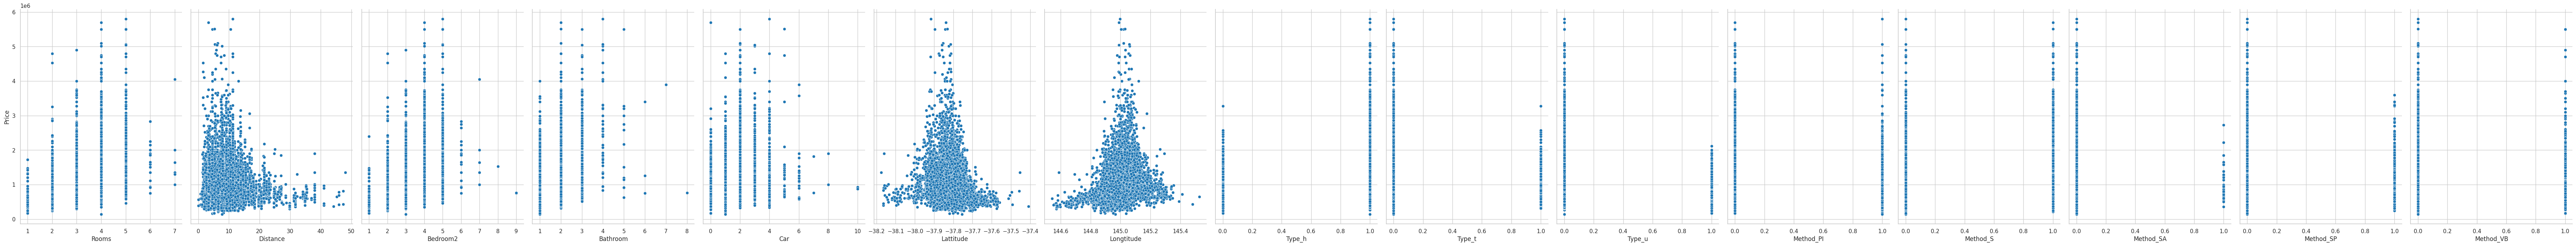

In [461]:
cols = list(train_set.columns.values)
cols.remove('Price')
sns.pairplot(train_set, x_vars=cols, y_vars='Price', height=7, aspect=0.7)
plt.show()

At the same time, considering that the longitude and latitude have the greatest effect on the regression, we could go back and check if other region features such as the _Region Name_, _Suburb_ or _Postcode_ provide us with more useful relations.